In [1]:
import torch 
import torchvision
from torchvision import datasets
import numpy as np
import time
import numpy
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision.datasets import MNIST

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
class MNIST_GPU(MNIST):
  def __init__(self, *args, **kwargs):
    super(MNIST_GPU, self).__init__(*args, **kwargs)

    # Convert to tensor and send to GPU
    self.data = self.data.to(device)
    self.targets = self.targets.to(device)

    # # Scale the data to [0,1]
    self.data = self.data.unsqueeze(1).float().div(255)

    # # Normalize the data
    self.data = self.data.sub_(0.1307).div_(0.3081)

    # # Flatten the dataset
    # self.data = torch.flatten(self.data, 1,-1)

  def __getitem__(self, idx):
    return self.data[idx], self.targets[idx]


  def __len__(self):
        return len(self.data) 


In [3]:
mnist_train= MNIST_GPU("mnist",
      train=True,
      download=True)

mnist_test=MNIST_GPU("mnist",
      train=False,
      download=True,
      )

Extracting mnist/MNIST_GPU/raw/train-images-idx3-ubyte.gz to mnist/MNIST_GPU/raw


Extracting mnist/MNIST_GPU/raw/train-labels-idx1-ubyte.gz to mnist/MNIST_GPU/raw


Extracting mnist/MNIST_GPU/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST_GPU/raw


Extracting mnist/MNIST_GPU/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST_GPU/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
input_size = 784
hidden_size = [1024,1024,1024,1024,1024]
num_classes = 10

train_loader1 = torch.utils.data.DataLoader(dataset=mnist_train, 
                                           batch_size=256, 
                                           shuffle=True)
train_loader2 = torch.utils.data.DataLoader(dataset=mnist_train, 
                                           batch_size=60000, 
                                           shuffle=True)
test_loader2=torch.utils.data.DataLoader(dataset=mnist_test, batch_size=10000,
                                           shuffle=True)

### Defining Network Parameters

In [5]:
class FiveLayer_NeuralNet_1024_problem_4(nn.Module):
    def __init__(self, input_size, hidden_size,initialization,num_classes,activation,dropout):
        super(FiveLayer_NeuralNet_1024_problem_4, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size[0])
        if initialization =='xavier':
          torch.nn.init.xavier_normal_(self.fc1.weight)
          torch.nn.init.zeros_(self.fc1.bias)
        if initialization == 'normal':
          torch.nn.init.normal_(self.fc1.weight,0, 0.01)
          torch.nn.init.zeros_(self.fc1.bias)
        if initialization == 'Kaiming':
          torch.nn.init.kaiming_normal_(self.fc1.weight)
          torch.nn.init.zeros_(self.fc1.bias)

        self.fc2 = nn.Linear(hidden_size[0], hidden_size[1]) 
        if initialization =='xavier':
          torch.nn.init.xavier_normal_(self.fc2.weight)
          torch.nn.init.zeros_(self.fc2.bias)
        if initialization == 'normal':
          torch.nn.init.normal_(self.fc2.weight,0, 0.01)
          torch.nn.init.zeros_(self.fc2.bias)
        if initialization == 'Kaiming':
          torch.nn.init.kaiming_normal_(self.fc2.weight)
          torch.nn.init.zeros_(self.fc2.bias)


        self.fc3 = nn.Linear(hidden_size[1], hidden_size[2]) 
        if initialization =='xavier':
          torch.nn.init.xavier_normal_(self.fc3.weight)
          torch.nn.init.zeros_(self.fc3.bias)
        if initialization == 'normal':
          torch.nn.init.normal_(self.fc3.weight,0, 0.01)
          torch.nn.init.zeros_(self.fc3.bias)
        if initialization == 'Kaiming':
          torch.nn.init.kaiming_normal_(self.fc3.weight)
          torch.nn.init.zeros_(self.fc3.bias) 

        self.fc4 = nn.Linear(hidden_size[2], hidden_size[3])
        if initialization =='xavier':
          torch.nn.init.xavier_normal_(self.fc4.weight)
          torch.nn.init.zeros_(self.fc4.bias)
        if initialization == 'normal':
          torch.nn.init.normal_(self.fc4.weight,0, 0.01)
          torch.nn.init.zeros_(self.fc4.bias)
        if initialization == 'Kaiming':
          torch.nn.init.kaiming_normal_(self.fc4.weight)
          torch.nn.init.zeros_(self.fc4.bias) 

        self.fc5 = nn.Linear(hidden_size[3], hidden_size[4])
        if initialization =='xavier':
          torch.nn.init.xavier_normal_(self.fc5.weight)
          torch.nn.init.zeros_(self.fc5.bias)
        if initialization == 'normal':
          torch.nn.init.normal_(self.fc5.weight,0, 0.01)
          torch.nn.init.zeros_(self.fc5.bias)
        if initialization == 'Kaiming':
          torch.nn.init.kaiming_normal_(self.fc5.weight)
          torch.nn.init.zeros_(self.fc5.bias) 

        self.fc6=  nn.Linear(hidden_size[4], num_classes)
        if initialization =='xavier':
          torch.nn.init.xavier_normal_(self.fc6.weight)
          torch.nn.init.zeros_(self.fc6.bias)
        if initialization == 'normal':
          torch.nn.init.normal_(self.fc6.weight,0, 0.01)
          torch.nn.init.zeros_(self.fc6.bias)
        if initialization == 'Kaiming':
          torch.nn.init.kaiming_normal_(self.fc6.weight)
          torch.nn.init.zeros_(self.fc6.bias) 
        
        if dropout== "Yes":
          self.firstlayer_dropout=torch.nn.Dropout(p=0.2)
          self.hiddenlayer_dropout=torch.nn.Dropout(p=0.5)
        if dropout=="No":
          self.firstlayer_dropout=torch.nn.Dropout(p=0)
          self.hiddenlayer_dropout=torch.nn.Dropout(p=0)

        if activation=="relu":
          self.act= nn.ReLU()
        if activation=="sigmoid":
          self.act=nn.Sigmoid()

    
    def forward(self, x):
        x = x.reshape(-1, 28*28).cuda()
        y=self.firstlayer_dropout(x)
        y1=self.fc1(y)
        self.layer1=self.act(y1)
        self.layer1_afterhidden=self.hiddenlayer_dropout(self.layer1)
        self.layer2 = self.act(self.fc2(self.layer1_afterhidden))
        self.layer2_afterhidden=self.hiddenlayer_dropout(self.layer2)
        self.layer3 = self.act(self.fc3(self.layer2_afterhidden))
        self.layer3_afterhidden=self.hiddenlayer_dropout(self.layer3)
        self.layer4 = self.act(self.fc4(self.layer3_afterhidden))
        self.layer4_afterhidden=self.hiddenlayer_dropout(self.layer4)
        self.layer5 = self.act(self.fc5(self.layer4_afterhidden))
        self.layer5_afterhidden=self.hiddenlayer_dropout(self.layer5)
        self.output = self.fc6(self.layer5_afterhidden)
        return self.output

### Below function final_ouput return the cross entropy error for training and test data

In [6]:
def final_ouput(model,num_epochs,train_loader,train_loader_test,test_loader,learning_rate):
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)  
  accuracy_list=[]
  total_step = len(train_loader)
  errt=[0 for i in range(num_epochs)]
  loss_training=[]
  loss_test=[]
  
  for epoch in range(num_epochs):
      running_loss=0
      model.train()
      for i, (images, labels) in enumerate(train_loader):  
          # Move tensors to the configured device
      
          labels = labels.to(device)
          # Forward pass
          outputs = model(images).cuda()
          loss = criterion(outputs.cuda(), labels.cuda())
          running_loss=running_loss+loss.item()
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()
      model.eval()
      loss_training1=accuracy(train_loader_test,model)
      model.eval()
      loss_test1=accuracy(test_loader,model)
      model.train()
      loss_training.append(loss_training1)
      loss_test.append(loss_test1)
      print("Epoch:", epoch,"Loss_training:",loss_training1,"loss_test:",loss_test1)
  accuracy_list.append(loss_training)
  accuracy_list.append(loss_test)
  return accuracy_list

### Calculation of Cross _Entropy Error

In [7]:
def accuracy(test_loader,model):

  criterion = nn.CrossEntropyLoss()
  model.eval()
  with torch.no_grad():
    for i, (images, labels) in enumerate(test_loader):
      labels = labels.cuda()
      outputs = model(images).cuda()
      hj=criterion(outputs.cuda(),labels.cuda())
  
  return hj.item()

### For Sigmoid and No Dropout

In [8]:
model1 = FiveLayer_NeuralNet_1024_problem_4(input_size, hidden_size,'xavier',num_classes,"sigmoid","No").cuda()
output1= final_ouput(model1,300,train_loader1,train_loader2,test_loader2,0.001)

Epoch: 0 Loss_training: 0.1999121457338333 loss_test: 0.20866815745830536
Epoch: 1 Loss_training: 0.10143658518791199 loss_test: 0.12457273155450821
Epoch: 2 Loss_training: 0.07188315689563751 loss_test: 0.10065488517284393
Epoch: 3 Loss_training: 0.05583172291517258 loss_test: 0.10152608156204224
Epoch: 4 Loss_training: 0.03430986404418945 loss_test: 0.08284575492143631
Epoch: 5 Loss_training: 0.03175458312034607 loss_test: 0.08515401184558868
Epoch: 6 Loss_training: 0.03425174579024315 loss_test: 0.0917866975069046
Epoch: 7 Loss_training: 0.03659508749842644 loss_test: 0.10091094672679901
Epoch: 8 Loss_training: 0.01914631761610508 loss_test: 0.09787600487470627
Epoch: 9 Loss_training: 0.01783856190741062 loss_test: 0.08737678825855255
Epoch: 10 Loss_training: 0.012739324010908604 loss_test: 0.0860423594713211
Epoch: 11 Loss_training: 0.011624958366155624 loss_test: 0.083619125187397
Epoch: 12 Loss_training: 0.008069957606494427 loss_test: 0.08096643537282944
Epoch: 13 Loss_training:

### For Sigmoid and Dropout

In [10]:
model4 = FiveLayer_NeuralNet_1024_problem_4(input_size, hidden_size,'xavier',num_classes,"sigmoid","Yes").cuda()
output2= final_ouput(model4,300,train_loader1,train_loader2,test_loader2,0.001)

Epoch: 0 Loss_training: 0.2803860008716583 loss_test: 0.27484098076820374
Epoch: 1 Loss_training: 0.1565965712070465 loss_test: 0.16838565468788147
Epoch: 2 Loss_training: 0.10635581612586975 loss_test: 0.1244647204875946
Epoch: 3 Loss_training: 0.09670912474393845 loss_test: 0.11596373468637466
Epoch: 4 Loss_training: 0.07358576357364655 loss_test: 0.09567620605230331
Epoch: 5 Loss_training: 0.06643437594175339 loss_test: 0.09457264095544815
Epoch: 6 Loss_training: 0.057136420160532 loss_test: 0.08572762459516525
Epoch: 7 Loss_training: 0.052227653563022614 loss_test: 0.07981620728969574
Epoch: 8 Loss_training: 0.042614419013261795 loss_test: 0.07024435698986053
Epoch: 9 Loss_training: 0.04319365695118904 loss_test: 0.07840703427791595
Epoch: 10 Loss_training: 0.03473634272813797 loss_test: 0.06714841723442078
Epoch: 11 Loss_training: 0.03130311146378517 loss_test: 0.06450565159320831
Epoch: 12 Loss_training: 0.02992498129606247 loss_test: 0.06447694450616837
Epoch: 13 Loss_training: 

### PLOT FOR SIGMOID

Text(0.5, 1.0, 'Cross Entropy Loss for Sigmoid for MNIST for 5x1024')

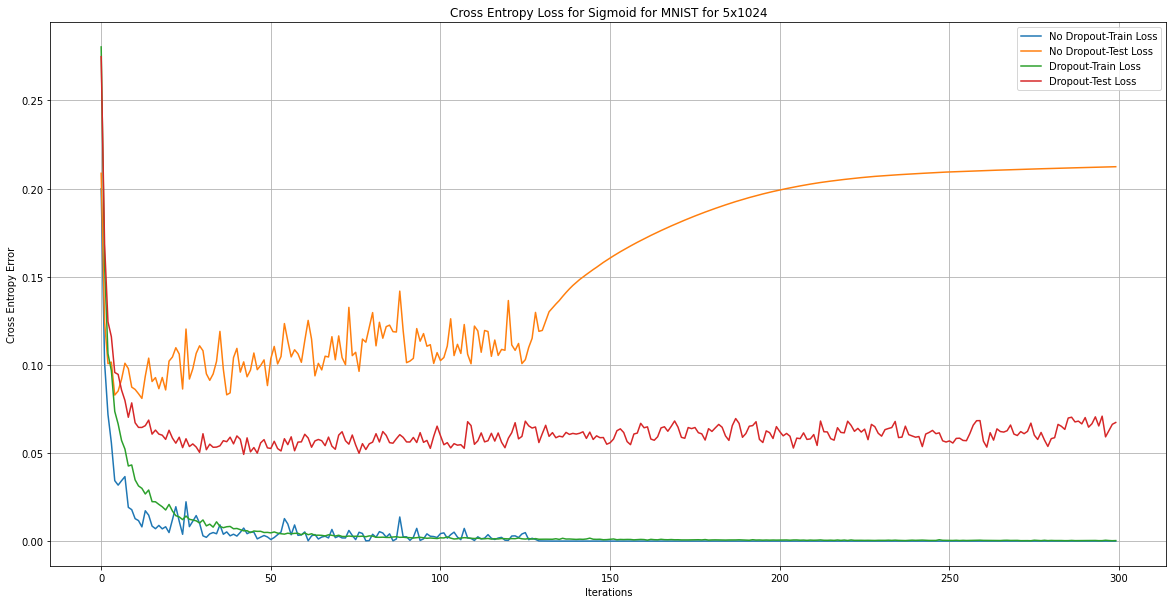

In [38]:
plt.figure(figsize=(20,10))
plt.plot(output1[0],label="No Dropout-Train Loss")
plt.plot(output1[1],label="No Dropout-Test Loss")
plt.plot(output2[0],label="Dropout-Train Loss")
plt.plot(output2[1],label="Dropout-Test Loss")
plt.legend()
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Cross Entropy Error')
plt.title('Cross Entropy Loss for Sigmoid for MNIST for 5x1024')

### For RELU with Dropout

In [33]:
model811 = FiveLayer_NeuralNet_1024_problem_4(input_size, hidden_size,'Kaiming',num_classes,"relu","Yes").cuda()
output3= final_ouput(model811,300,train_loader1,train_loader2,test_loader2,0.0001)

Epoch: 0 Loss_training: 1.9356281757354736 loss_test: 1.9280388355255127
Epoch: 1 Loss_training: 1.276080846786499 loss_test: 1.2546465396881104
Epoch: 2 Loss_training: 0.775124192237854 loss_test: 0.7550795674324036
Epoch: 3 Loss_training: 0.5751522779464722 loss_test: 0.5529252290725708
Epoch: 4 Loss_training: 0.4342467188835144 loss_test: 0.4133104085922241
Epoch: 5 Loss_training: 0.3605448603630066 loss_test: 0.34222185611724854
Epoch: 6 Loss_training: 0.30762621760368347 loss_test: 0.2927516996860504
Epoch: 7 Loss_training: 0.2692513167858124 loss_test: 0.25844401121139526
Epoch: 8 Loss_training: 0.2428210824728012 loss_test: 0.23468530178070068
Epoch: 9 Loss_training: 0.22126905620098114 loss_test: 0.21662473678588867
Epoch: 10 Loss_training: 0.20325970649719238 loss_test: 0.2011243849992752
Epoch: 11 Loss_training: 0.18625508248806 loss_test: 0.1854586899280548
Epoch: 12 Loss_training: 0.17787568271160126 loss_test: 0.17928840219974518
Epoch: 13 Loss_training: 0.1631818413734436

### For Relu with no Dropout

In [34]:
model812 = FiveLayer_NeuralNet_1024_problem_4(input_size, hidden_size,'Kaiming',num_classes,"relu","No").cuda()
output4= final_ouput(model812,300,train_loader1,train_loader2,test_loader2,0.0001)

Epoch: 0 Loss_training: 0.09111800789833069 loss_test: 0.1260330229997635
Epoch: 1 Loss_training: 0.04596397280693054 loss_test: 0.09407348930835724
Epoch: 2 Loss_training: 0.024846553802490234 loss_test: 0.08298078924417496
Epoch: 3 Loss_training: 0.013628046959638596 loss_test: 0.08105511963367462
Epoch: 4 Loss_training: 0.00922287069261074 loss_test: 0.07888802886009216
Epoch: 5 Loss_training: 0.0063466355204582214 loss_test: 0.08645546436309814
Epoch: 6 Loss_training: 0.004980512894690037 loss_test: 0.0800572857260704
Epoch: 7 Loss_training: 0.002118963748216629 loss_test: 0.08100280910730362
Epoch: 8 Loss_training: 0.007265802007168531 loss_test: 0.08882765471935272
Epoch: 9 Loss_training: 0.011200955137610435 loss_test: 0.09898153692483902
Epoch: 10 Loss_training: 0.010412802919745445 loss_test: 0.09895719587802887
Epoch: 11 Loss_training: 0.010463330894708633 loss_test: 0.10428556054830551
Epoch: 12 Loss_training: 0.00417970959097147 loss_test: 0.08591372519731522
Epoch: 13 Loss

### PLOT FOR RELU

(0.0, 300.0)

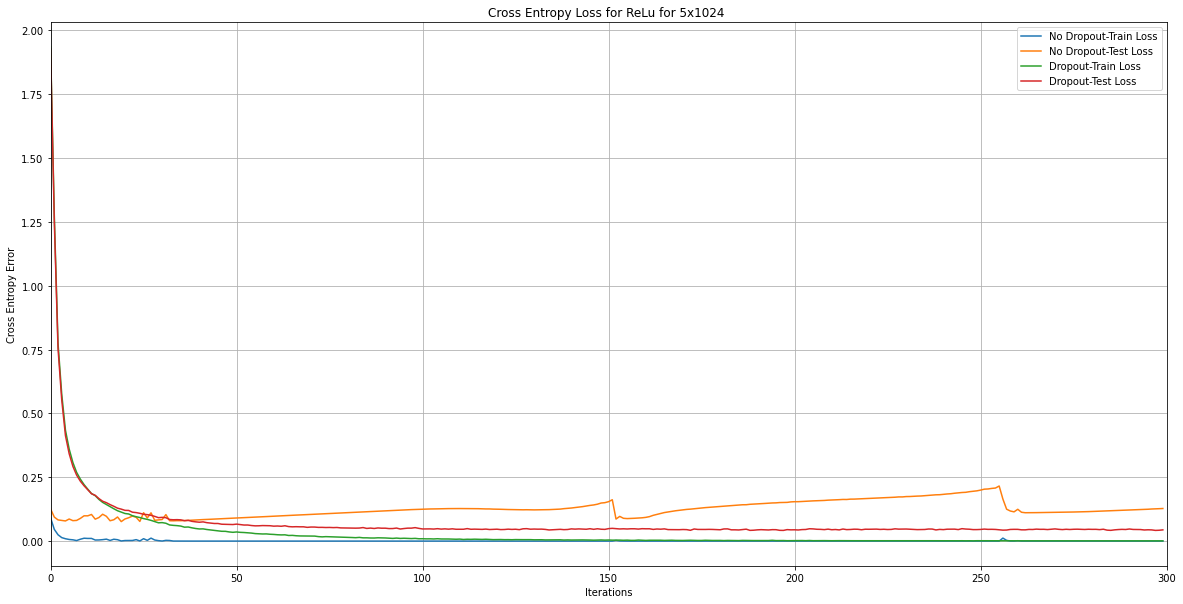

In [39]:
plt.figure(figsize=(20,10))
plt.plot(output4[0],label="No Dropout-Train Loss")
plt.plot(output4[1],label="No Dropout-Test Loss")
plt.plot(output3[0],label="Dropout-Train Loss")
plt.plot(output3[1],label="Dropout-Test Loss")
plt.legend()
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Cross Entropy Error')
plt.title('Cross Entropy Loss for ReLu for 5x1024 ')
plt.xlim(0, 300)